In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1

import scipy

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt1.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_supcat, dprime_by_supcat, rt_by_supcat = analyze_expt1.get_perf_by_supercateg()


In [3]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255

xjitters = np.array([-0.2, 0.2])


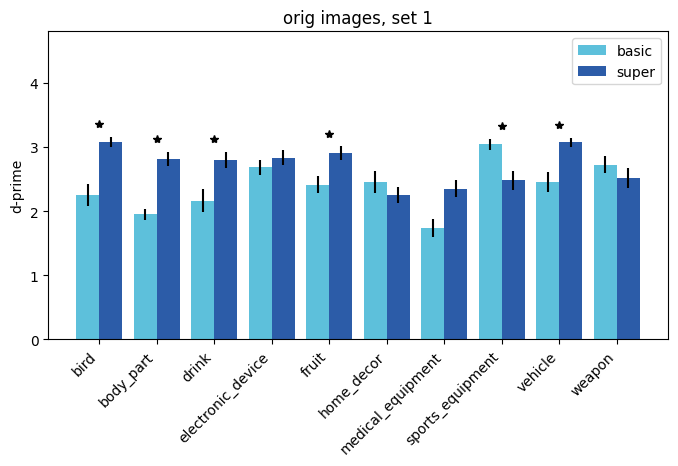

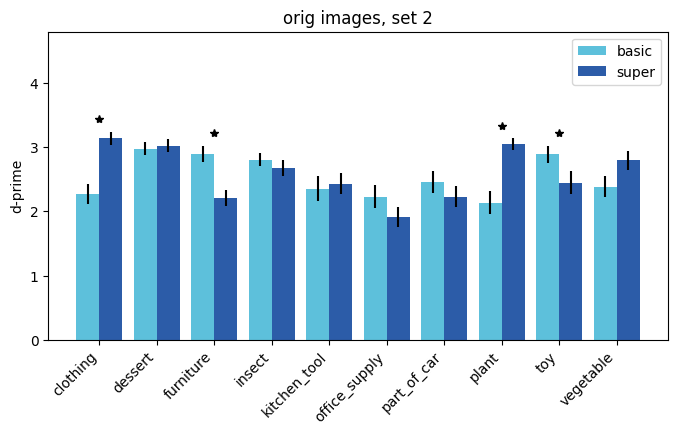

In [4]:
for cbi in [0,1]:

    ii = 4;

    plt.figure(figsize=(8,4))

    ax = plt.subplot(1,1,1)

    d = dprime_by_supcat[cbi][:,:,ii,:]
    n_super = d.shape[2]
    
    t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = np.arange(n_super)+xjitters[cc]

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)
        
        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')
        
    
    for sc in range(n_super):
        
        if p[sc]<0.01:
            height = np.max(meanvals[:,sc]+semvals[:,sc])+0.20
            plt.plot(sc, height, '*', color='k')
        
    plt.xticks(np.arange(n_super), super_names[super_cbinds==cbi], rotation=45, ha='right');

    plt.ylabel('d-prime')

    plt.ylim([0, 4.8])
    
    ax.legend(lh, cue_level_names, loc='upper right')


    # plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.title('%s images, set %d'%(image_type_names[ii], cbi+1))

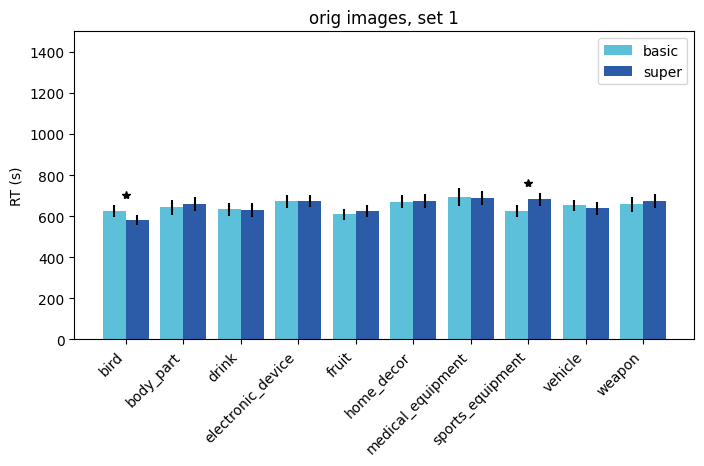

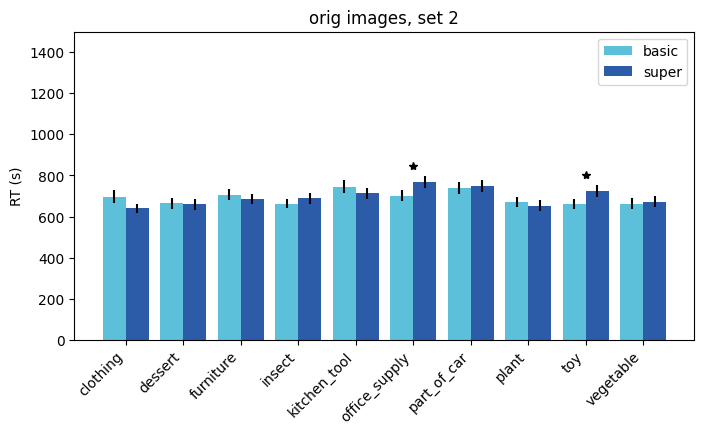

In [5]:
for cbi in [0,1]:

    ii = 4;

    plt.figure(figsize=(8,4))

    ax = plt.subplot(1,1,1)

    d = rt_by_supcat[cbi][:,:,ii,:]
    n_super = d.shape[2]
    
    t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = np.arange(n_super)+xjitters[cc]

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)
        
        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')
        
    
    for sc in range(n_super):
        
        if p[sc]<0.01:
            height = np.max(meanvals[:,sc]+semvals[:,sc])+50
            plt.plot(sc, height, '*', color='k')
        
    plt.xticks(np.arange(n_super), super_names[super_cbinds==cbi], rotation=45, ha='right');

    plt.ylabel('RT (s)')

    plt.ylim([0, 1500])
    
    ax.legend(lh, cue_level_names, loc='upper right')


    # plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.title('%s images, set %d'%(image_type_names[ii], cbi+1))

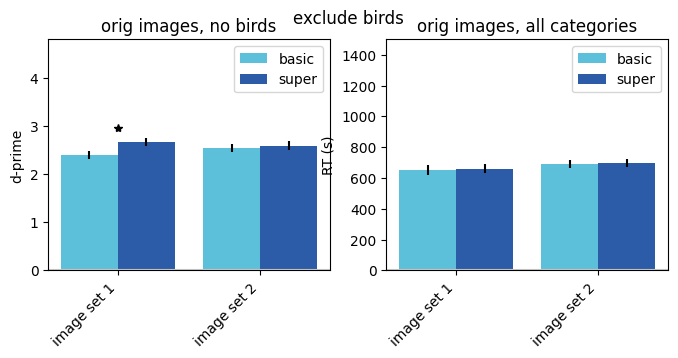

In [21]:
plt.figure(figsize=(8,3))

ax = plt.subplot(1,2,1)

for cbi in [0,1]:

    ii = 4;

    categ_use = super_names[super_cbinds==cbi]!='bird'
    
    d = np.mean(dprime_by_supcat[cbi][:,:,ii,categ_use], axis=2)

    # print(d[0,0])

    t, p = scipy.stats.ttest_rel(d[:,0], d[:,1], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = cbi+xjitters[cc]

        h = plt.bar(x, meanvals[cc], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)

        plt.errorbar(x, meanvals[cc], semvals[cc], linestyle='none', color='k')

    if p<0.01:
        height = np.max(meanvals+semvals)+0.20
        plt.plot(cbi, height, '*', color='k')

plt.xticks(np.arange(2), ['image set 1','image set 2'], rotation=45, ha='right');

plt.ylabel('d-prime')

plt.ylim([0, 4.8])

ax.legend(lh, cue_level_names, loc='upper right')

plt.axhline(0, color=[0.8, 0.8, 0.8])

plt.title('%s images, no birds'%(image_type_names[ii]))




ax = plt.subplot(1,2,2)

for cbi in [0,1]:

    ii = 4;

    categ_use = super_names[super_cbinds==cbi]!='bird'
    
    d = np.mean(rt_by_supcat[cbi][:,:,ii,categ_use], axis=2)
    # print(d[0,0])

    t, p = scipy.stats.ttest_rel(d[:,0], d[:,1], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = cbi+xjitters[cc]

        h = plt.bar(x, meanvals[cc], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)

        plt.errorbar(x, meanvals[cc], semvals[cc], linestyle='none', color='k')

    if p<0.01:
        height = np.max(meanvals+semvals)+0.50
        plt.plot(cbi, height, '*', color='k')

plt.xticks(np.arange(2), ['image set 1','image set 2'], rotation=45, ha='right');

plt.ylabel('RT (s)')

plt.ylim([0, 1500])

ax.legend(lh, cue_level_names, loc='upper right')

plt.axhline(0, color=[0.8, 0.8, 0.8])

plt.title('%s images, all categories'%(image_type_names[ii]))

plt.suptitle('exclude birds');

2.9899101228456666
2.2593232007660924
472.64
899.5


Text(0.5, 1.0, 'orig images, all categories')

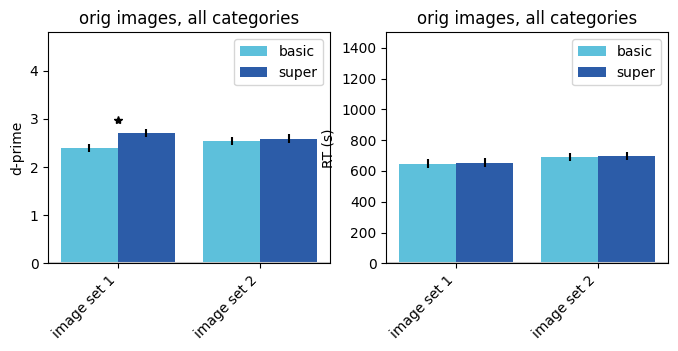

In [4]:
plt.figure(figsize=(8,3))

ax = plt.subplot(1,2,1)

for cbi in [0,1]:

    ii = 4;

    d = np.mean(dprime_by_supcat[cbi][:,:,ii,:], axis=2)

    print(d[0,0])

    t, p = scipy.stats.ttest_rel(d[:,0], d[:,1], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = cbi+xjitters[cc]

        h = plt.bar(x, meanvals[cc], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)

        plt.errorbar(x, meanvals[cc], semvals[cc], linestyle='none', color='k')

    if p<0.01:
        height = np.max(meanvals+semvals)+0.20
        plt.plot(cbi, height, '*', color='k')

plt.xticks(np.arange(2), ['image set 1','image set 2'], rotation=45, ha='right');

plt.ylabel('d-prime')

plt.ylim([0, 4.8])

ax.legend(lh, cue_level_names, loc='upper right')

plt.axhline(0, color=[0.8, 0.8, 0.8])

plt.title('%s images, all categories'%(image_type_names[ii]))




ax = plt.subplot(1,2,2)

for cbi in [0,1]:

    ii = 4;

    d = np.mean(rt_by_supcat[cbi][:,:,ii,:], axis=2)

    print(d[0,0])

    t, p = scipy.stats.ttest_rel(d[:,0], d[:,1], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = cbi+xjitters[cc]

        h = plt.bar(x, meanvals[cc], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)

        plt.errorbar(x, meanvals[cc], semvals[cc], linestyle='none', color='k')

    if p<0.01:
        height = np.max(meanvals+semvals)+0.50
        plt.plot(cbi, height, '*', color='k')

plt.xticks(np.arange(2), ['image set 1','image set 2'], rotation=45, ha='right');

plt.ylabel('RT (s)')

plt.ylim([0, 1500])

ax.legend(lh, cue_level_names, loc='upper right')

plt.axhline(0, color=[0.8, 0.8, 0.8])

plt.title('%s images, all categories'%(image_type_names[ii]))